# Srint 15 Final Project

Supermarket chian **Good Seed** would like to explore whether data science can help them adhere to alcohol laws by making sure they do not sell alcohol to underage people.

The task is to build a model that can predict people's age using facial imaging. We will complete this task by training a regression vision model to predict the age of people within the images in the training and test sets. 

The dataset was obtained from <a href="http://chalearnlap.cvc.uab.es/dataset/26/description/">ChaLearn Looking at People</a>. It was contains 7.6k photos within the `final_files` folder. The file with labels can be found in `labels.csv` containing 2 columns; `file_name` and `real_age`

<p style="text-align:center; font-size:20px">Let's Begin!</p>

## Initialization

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
# Loading dataset for EDA
real_age = pd.read_csv('/datasets/faces/labels.csv')
real_age.head(3)

file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80

In [3]:
real_age.duplicated().sum()

0

In [4]:
real_age.isna().sum()

file_name    0
real_age     0
dtype: int64

In [5]:
# Loading data
train_datagen = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1./255
)

val_datagen = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1./255
)

In [6]:
train_datagen_flow = train_datagen.flow_from_dataframe(
    dataframe = real_age,
    directory = '/datasets/faces/final_files/',
    target_size = (224,224),
    x_col = 'file_name',
    y_col = 'real_age',
    batch_size = 16,
    class_mode = 'raw',
    subset = 'training',
    seed = 12345
)

val_datagen_flow = val_datagen.flow_from_dataframe(
    dataframe = real_age,
    directory = '/datasets/faces/final_files/',
    target_size = (224,224),
    x_col = 'file_name',
    y_col = 'real_age',
    batch_size = 16,
    class_mode = 'raw',
    subset = 'validation',
    seed = 12345
)

Found 6073 validated image filenames.
Found 1518 validated image filenames.


## EDA

<AxesSubplot:xlabel='real_age', ylabel='Count'>

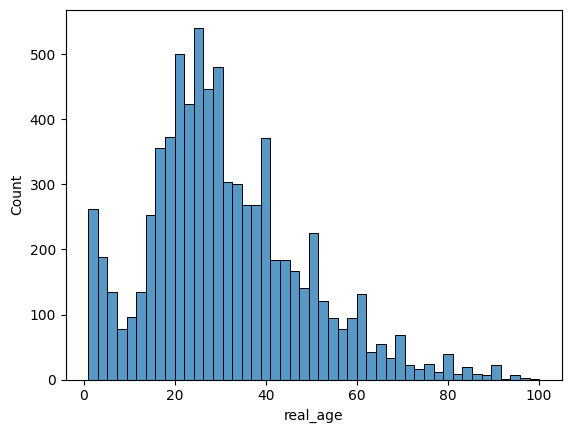

In [7]:
# Checking target distribution
sns.histplot(real_age['real_age'])

Distribution is skewed to the right but we hope our neural network won't inherit any bias. There aren't many images for our model to train with of labels greater than 60. This could possibly lead to our model making inaccurate predictions for images with `real_age` values above 60.

In [8]:
real_age.describe()

real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000

In [9]:
# Creating train and validation sets
X_train, y_train = next(train_datagen_flow)

X_valid, y_valid = next(val_datagen_flow)

print(X_train.shape, y_train.shape)
print()
print(X_valid.shape, y_valid.shape)

(16, 224, 224, 3) (16,)

(16, 224, 224, 3) (16,)


Real age:  39


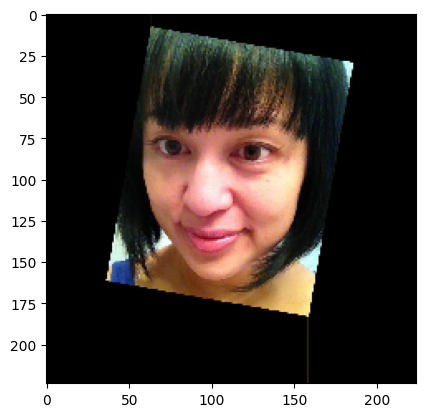

In [10]:
plt.imshow(X_train[0])
print('Real age: ', y_train[0])

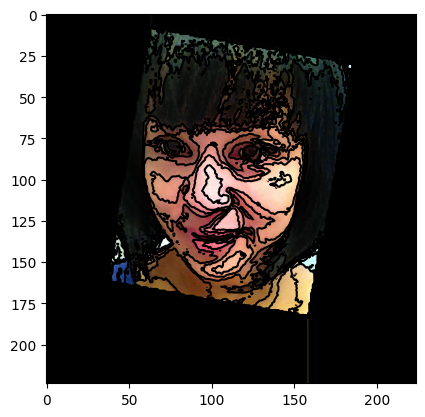

In [11]:

plt.contour(np.mean(X_train[0],axis=2),colors='black')
plt.imshow(X_train[0])

Real age:  46


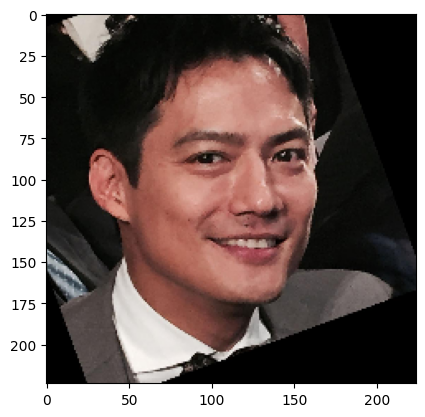

In [12]:
plt.imshow(X_train[10])
print('Real age: ',y_train[10])

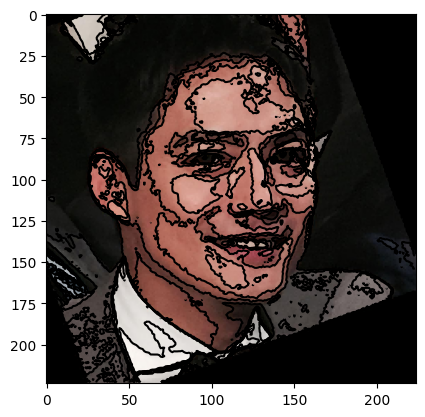

In [13]:
plt.contour(np.mean(X_train[10],axis=2),colors='black')
plt.imshow(X_train[10])

Real age:  34


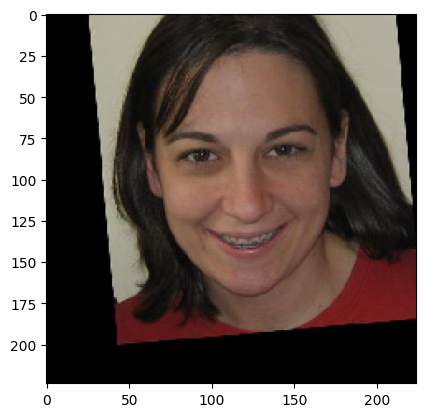

In [14]:
plt.imshow(X_train[13])
print('Real age: ', y_train[13])

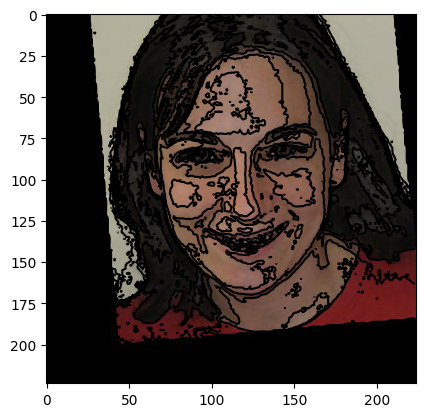

In [15]:
plt.contour(np.mean(X_train[13],axis=2),colors='black')
plt.imshow(X_train[13])

Real age:  20


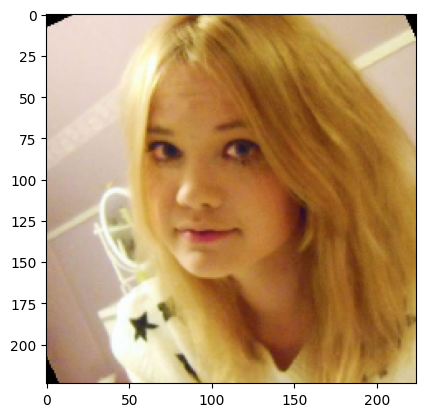

In [16]:
plt.imshow(X_train[9])
print('Real age: ', y_train[9])

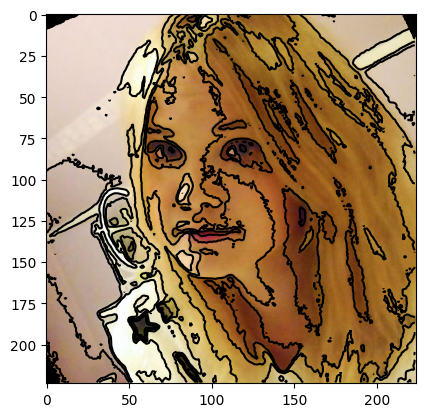

In [17]:
plt.contour(np.mean(X_train[9],axis=2),colors='black')
plt.imshow(X_train[9])

Real age:  27


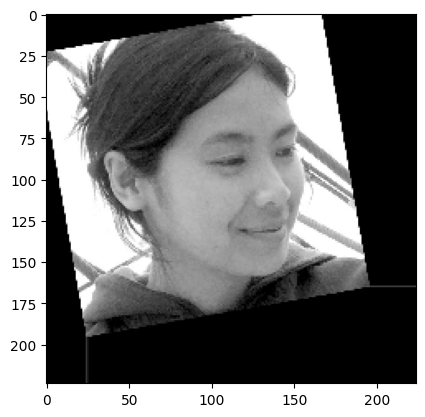

In [18]:
plt.imshow(X_train[1])
print('Real age: ', y_train[1])

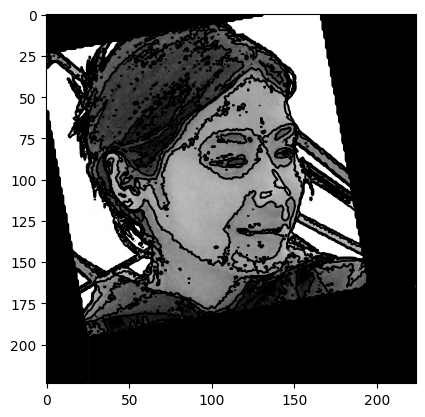

In [19]:
plt.contour(np.mean(X_train[1],axis=2),colors='black')
plt.imshow(X_train[1])

Real age:  18


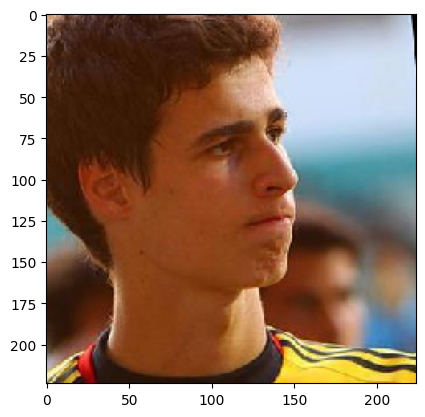

In [20]:
plt.imshow(X_train[5])
print('Real age: ', y_train[5])

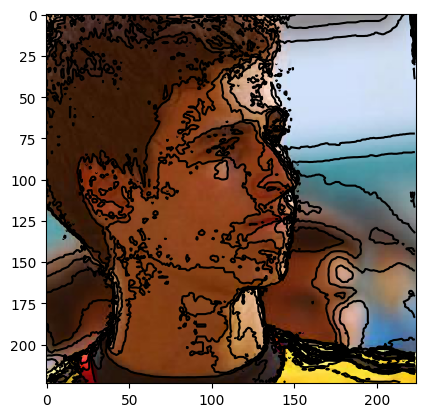

In [21]:
plt.contour(np.mean(X_train[5],axis=2),colors='black')
plt.imshow(X_train[5])

Real age:  24


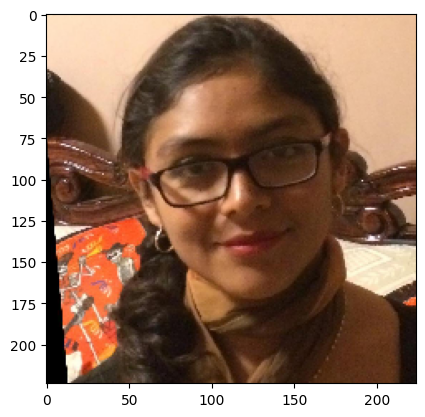

In [22]:
plt.imshow(X_train[15])
print('Real age: ', y_train[15])

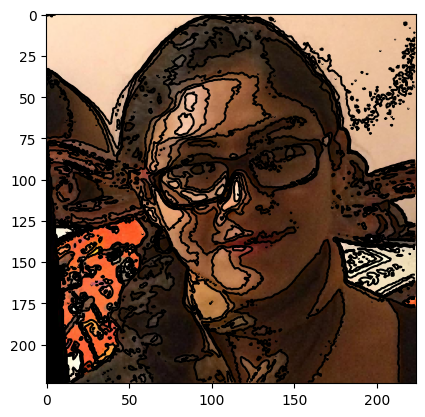

In [23]:
plt.contour(np.mean(X_train[15],axis=2),colors='black')
plt.imshow(X_train[15],cmap='gray',vmin=0,vmax=255)

Real age:  41


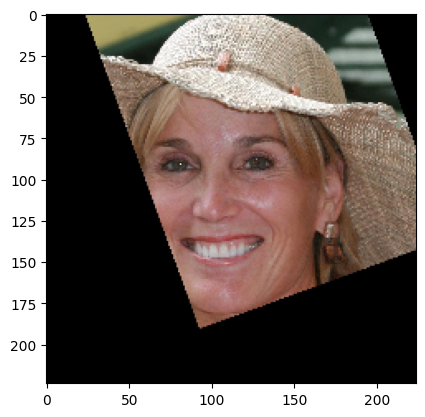

In [24]:
plt.imshow(X_train[2])
print('Real age: ', y_train[2])

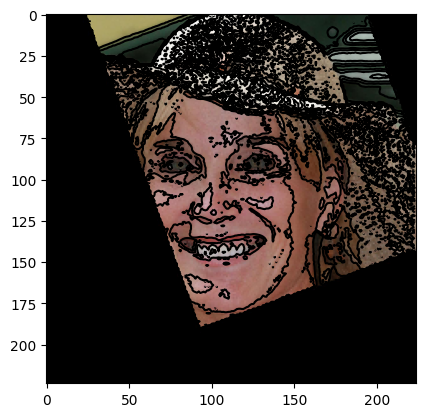

In [25]:
plt.contour(np.mean(X_train[2],axis=2),colors='black')
plt.imshow(X_train[2])

Real age:  14


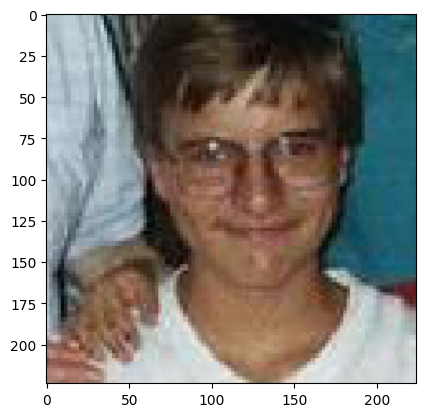

In [26]:
plt.imshow(X_train[4])
print('Real age: ', y_train[4])

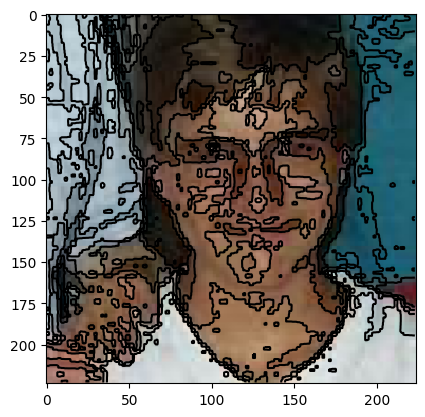

In [27]:
plt.contour(np.mean(X_train[4],axis=2),colors='black')
plt.imshow(X_train[4])

Real age:  23


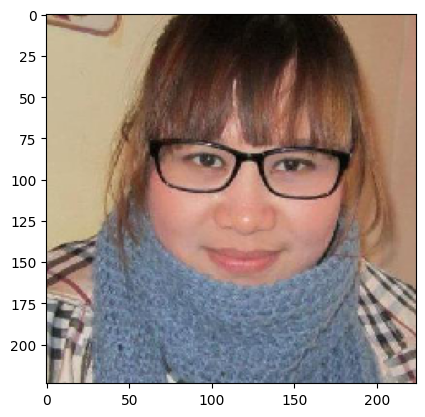

In [28]:
plt.imshow(X_train[6])
print('Real age: ', y_train[6])

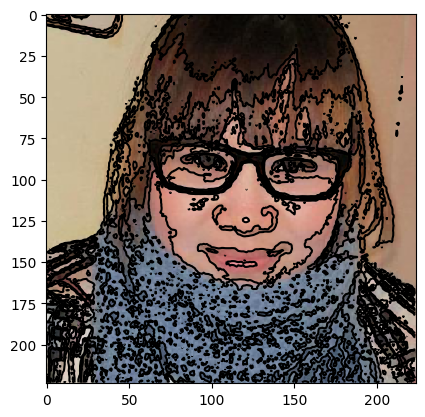

In [29]:
plt.contour(np.mean(X_train[6],axis=2),colors='black')
plt.imshow(X_train[6])

Real age:  69


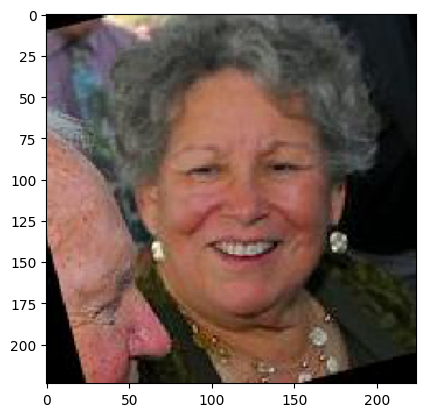

In [30]:
plt.imshow(X_train[8])
print('Real age: ', y_train[8])

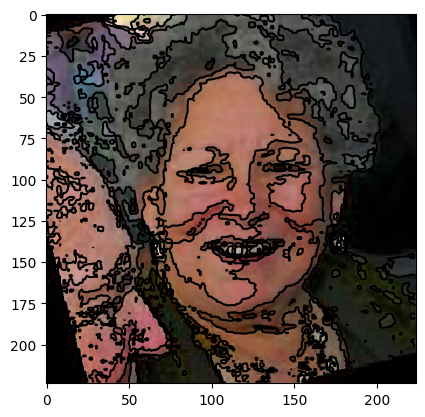

In [31]:
plt.contour(np.mean(X_train[8],axis=2),colors='black')
plt.imshow(X_train[8])

Real age:  50


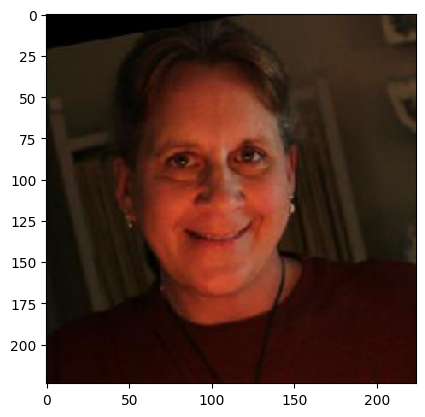

In [32]:
plt.imshow(X_train[11])
print('Real age: ', y_train[11])

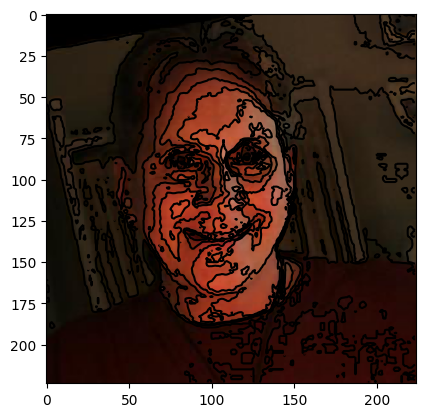

In [33]:
plt.contour(np.mean(X_train[11],axis=2),colors='black')
plt.imshow(X_train[11])

Real age:  58


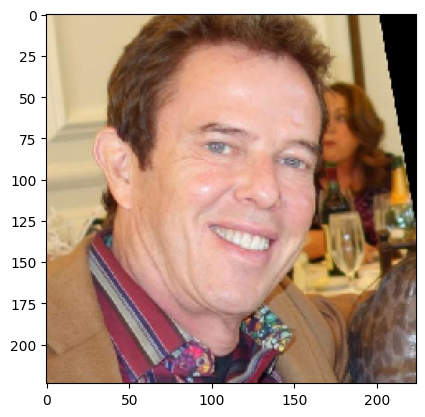

In [34]:
plt.imshow(X_train[12])
print('Real age: ', y_train[12])

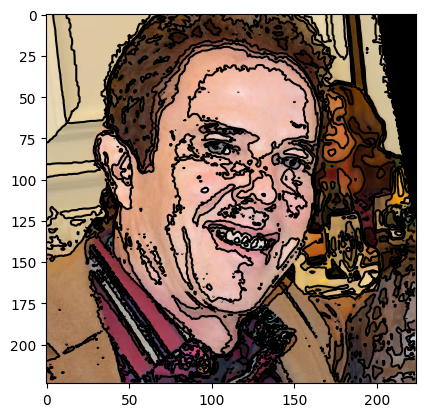

In [35]:
plt.contour(np.mean(X_train[12],axis=2),colors='black')
plt.imshow(X_train[12])

Real age:  46


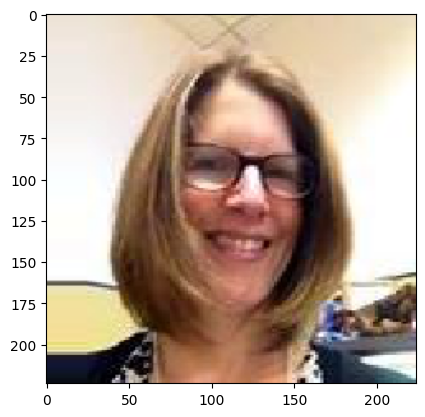

In [36]:
plt.imshow(X_train[7])
print('Real age: ', y_train[7])

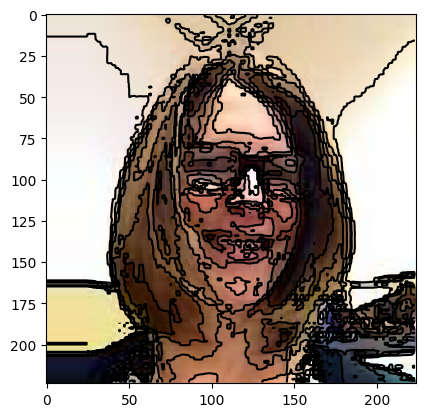

In [37]:
plt.contour(np.mean(X_train[7],axis=2),colors='black')
plt.imshow(X_train[7])

Real age:  25


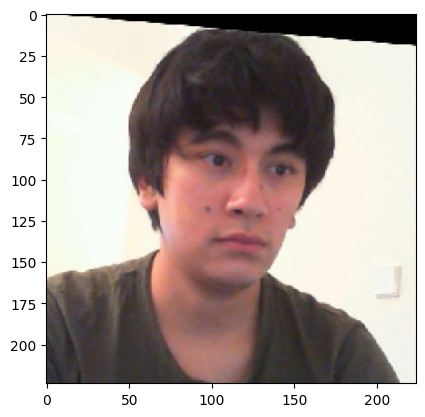

In [38]:
plt.imshow(X_train[14])
print('Real age: ',y_train[14])

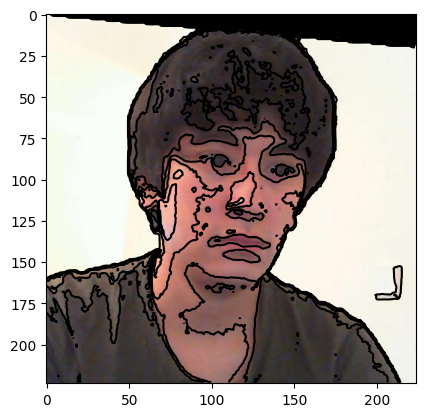

In [39]:
plt.contour(np.mean(X_train[14],axis=2),colors='black')
plt.imshow(X_train[14])

The batched images range from 14-69 years. I noticed significantly less contour lines on the images of the younger aged people, specifically the images with labels under 30. 

There is one image with a `real_age` value  above 50 and has an unsually low amount of contours on his face. He does seem as though he has went through some cosmetic procedures, such as botox, which could potentially decieve our model. 

I researched the dataset and found there may be some images that should do not belong, like a raccooo and group photos, which could negatively affect our model's training as well. We'll explore making the necessary changes to our training set. 

Let's see what the distribution looks like on our initial batch.

<AxesSubplot:ylabel='Count'>

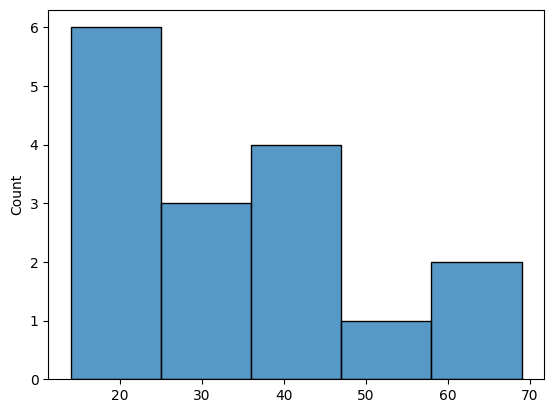

In [40]:
# Checking target distribution for previewed batch
sns.histplot(y_train)

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [41]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [42]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    
    train_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale = 1./255
    ) 
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe = real_age,
        directory = '/datasets/faces/final_files/',
        target_size = (224,224),
        x_col = 'file_name',
        y_col = 'real_age',
        batch_size = 32,
        class_mode = 'raw',
        subset = 'training',
        seed = 12345
    )

    return train_gen_flow

In [43]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    labels = pd.read_csv(path + 'lables.csv')
    
    val_datagen = ImageDataGnerator(
        validation_split = 0.2,
        rescale = 1./255
    )
    
    val_gen_flow = val_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size = (224,224),
        batch_size = 32,
        class_mode = 'raw',
        subset = 'validation',
        seed = 12345
    )
    
    return test_gen_flow

In [44]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    
    base_model = ResNet50(
        include_top = False,
        classifier_activation = None,
        input_shape = input_shape
    )
    base_model.trainable = False
    
    model = Sequential()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())

    model.add(Flatten())
    model.add(Dense(units=40,activation='tanh'))
    model.add(Dense(units=1,activation='relu'))
    
    return model

In [45]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    optimizer = Adam(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='mse',metrics=['mae'])

    X_train, y_train = train_data
    X_test, y_test = test_data
    
    model.fit(
        X_train,
        y_train,
        validation_data = (X_test,y_test),
        batch_size =  batch_size,
        epoch = epochs,
        steps_per_epoch = steps_per_epoch,
        validation_steps = validation_steps,
        verbose = 2,
        shuffle = True
    )

    return model

In [46]:
# Preparing a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921<br>
Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035<br>
Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454<br>
Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481<br>
Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192<br>
Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332<br>
Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359<br>
Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239<br>
Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529<br>
Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629<br>
Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866<br>
Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591<br>
Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467<br>
Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401<br>
Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841<br>
Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304<br>
Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419<br>
Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226<br>
Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908<br>
Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

## Conclusions

Looking through the training results, we can see there have been improvements through the 20 epochs. The model's training log shows the lowest mean absolute error training score is recorded at epoch 18. The validation mean absolute error is recorded at 6.72, which is almost a third of the age limit in most, if not all, states in the U.S. 

This poses an unnecessary risk of potential liquor license suspension. The model's MAE score is not low enough to give confidence in its ability to solve the problem in a meaningful way. 

This model could yield better results if each image within the training set was manually checked for relevance (would be a laborious task) along with some fine tuning, even using different base models, in an effort to produce a lower MAE score can be computationally expensive with uncertain results. Given genetics can play a part in people's visible aging, including race/ethnicity as a feature in with the dataset for training could improve results as well. 

The model we programmed could also serve other practical uses, such as medical purposes. The model is essentially predicting how old folks are by their looks, such that if a person looks a lot older than they are it could lead to health implications. I can imagine this could also help with marketing cosmetics. If the model predicts a person's age via image without cosmetics then predicts a younger age with cosmetics, could be a big selling point. 

In summary, the neural network we've used in this project displayed the ability to learn how to determine age of a person in an image given the lower mean average error score results through 20 epochs. We find the model, as is, would not effectively solve Good Seed's problem verifying people's age when purchasing liquor due to the final mean absolute error produced after 20 epochs of training. There are some adjustments that could be made to improve the model's performance but, as is, this model could potentially have other practical uses. 